# 1) l'importation des bibliothèques

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import model_selection
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# 2) Importer les données depuis exel

In [2]:
train_frame = pd.read_csv('./train.csv', engine='python')
test_frame = pd.read_csv('./test.csv', engine='python')

In [3]:
train_frame.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


# 3) Affichage des résumés statistique du Data Sets

In [4]:
train_frame.shape
test_frame.shape

(72711, 189)

In [5]:
train_frame.describe()

,id,league_id,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
count,1.109380e+05,110938.000000,8.921700e+04,8.912300e+04,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,...,109712.000000,108345.000000,106904.000000,105422.000000,103938.000000,102512.000000,101071.000000,99643.000000,98176.000000,96722.000000
mean,1.519875e+07,910.457012,1.287134e+07,1.291552e+07,0.306944,0.567801,0.466141,0.519469,0.487857,0.507288,...,901.986200,894.389137,886.368012,878.243611,869.450297,861.901455,853.435338,844.673223,837.678200,829.177374
std,2.536393e+06,549.120985,1.578479e+07,1.580344e+07,0.461228,0.495384,0.498855,0.499623,0.499855,0.499949,...,545.826707,542.247411,538.497274,534.864981,531.170701,527.338931,524.217968,520.954647,517.647869,514.900676
min,1.142829e+07,2.000000,2.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.200038e+07,444.000000,4.596120e+05,4.595650e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,438.000000,432.000000,426.000000,420.000000,417.000000,408.000000,399.000000,391.500000,387.000000,387.000000
50%,1.675988e+07,947.000000,1.552728e+06,1.552806e+06,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,944.000000,935.000000,906.500000,899.000000,884.000000,881.000000,860.000000,830.000000,821.000000,806.000000
75%,1.724230e+07,1293.000000,3.243116e+07,3.279539e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1286.000000,1283.000000,1279.000000,1274.000000,1270.000000,1267.000000,1265.000000,1263.000000,1261.000000,1255.000000
max,1.805384e+07,2039.000000,3.756849e+07,3.756847e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2028.000000,2025.000000


In [6]:
# Description des colonnes de type string
train_frame.describe(include = [object])

,target,home_team_name,away_team_name,match_date,league_name,is_cup,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,...,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10
count,110938,110937,110937,110938,110937,110937,109779,108487,107165,105837,...,109712,108345,106904,105422,103938,102512,101071,99643,98176,96722
unique,3,9813,9892,20269,727,2,19552,19543,19646,19763,...,19611,19523,19639,19709,19871,19748,19788,19665,19602,19361
top,home,Al Ittihad,Al Ittihad,2020-09-19 14:00:00,Premier League,False,2020-09-19 14:00:00,2020-09-19 14:00:00,2020-09-19 14:00:00,2020-09-19 14:00:00,...,2020-09-26 14:00:00,2020-09-19 14:00:00,2020-09-26 14:00:00,2020-09-19 14:00:00,2019-12-07 15:00:00,2020-03-07 15:00:00,2020-03-07 15:00:00,2020-02-22 15:00:00,2020-03-07 15:00:00,2020-02-22 15:00:00
freq,48113,91,82,201,5565,101856,196,188,186,177,...,193,194,185,173,172,169,183,175,166,162


# 4) Visualisation des données

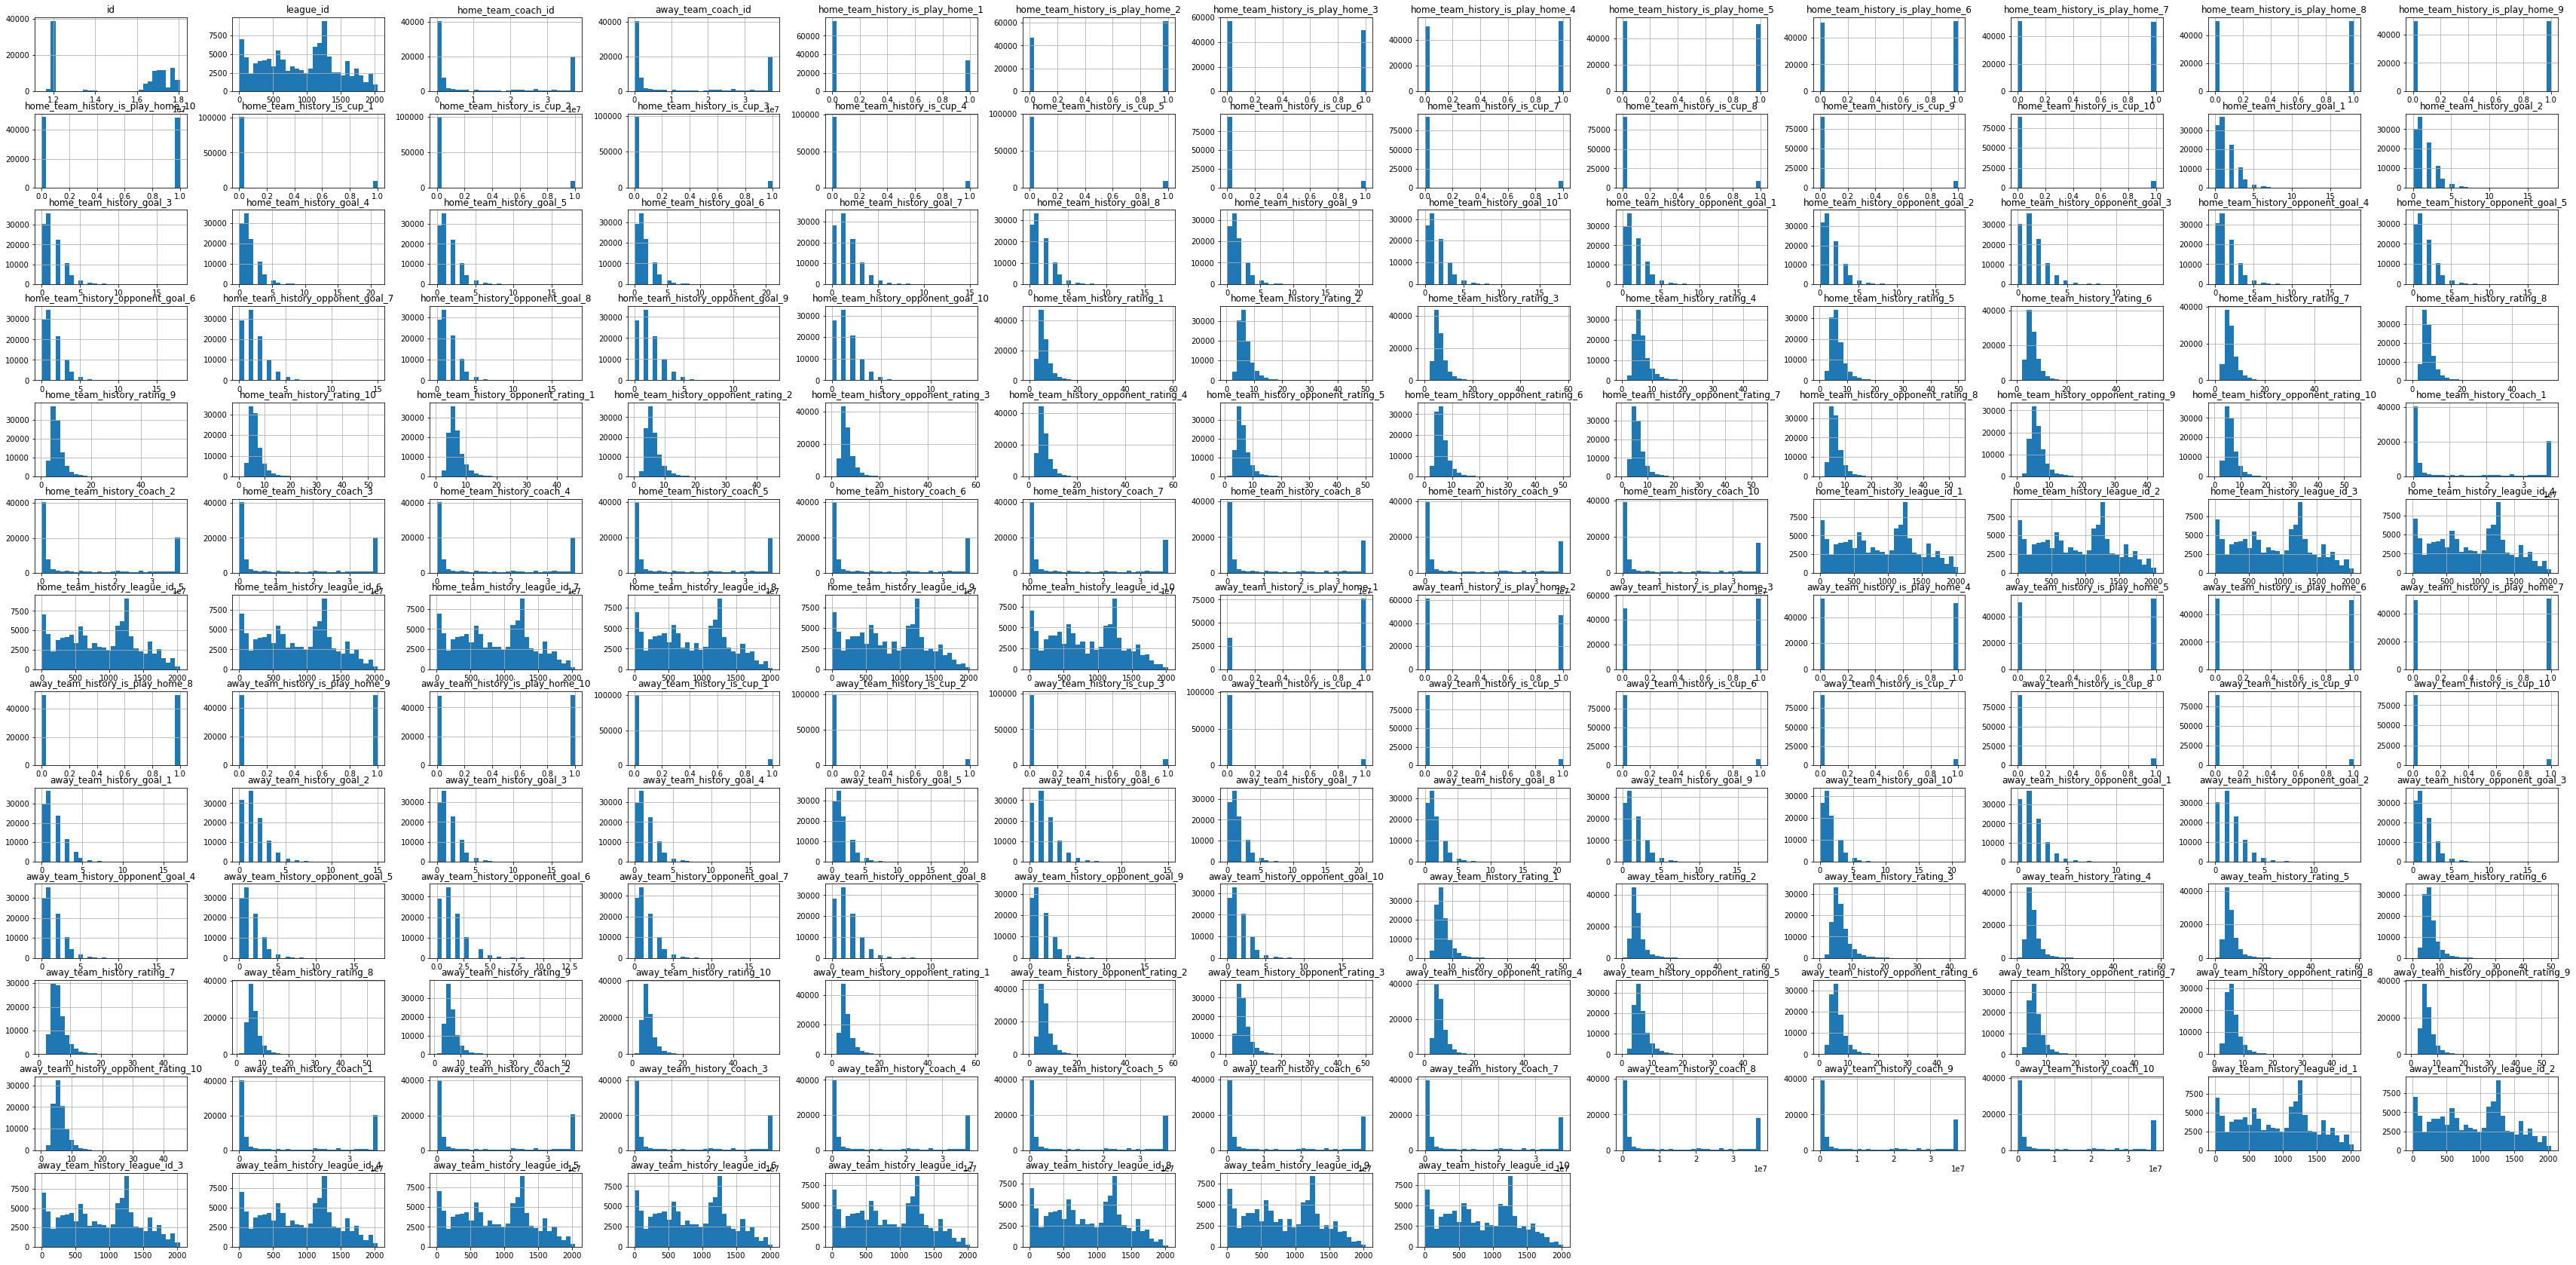

In [7]:
train_frame.hist(bins = 30 , figsize= (60,30)) ;

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

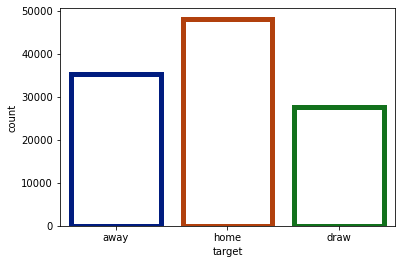

In [8]:
sns.countplot(train_frame['target'],facecolor=(0, 0, 0, 0),

                   linewidth=5,

                   edgecolor=sns.color_palette("dark", 3))

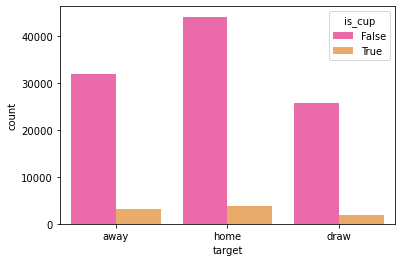

In [9]:
ax  =  sns . countplot ( x = "target" ,  hue = "is_cup" ,  data = train_frame ,  palette = "spring" )

# 5) verifier l'existence des valeurs null dans quelque colonnes

In [10]:
#getting all the goals collumns 
nan_goals = [_ for _ in train_frame.columns if "goal" in _]

In [11]:
#spotting the missing data in train file (goals)
train_frame[nan_goals].isna().sum()

home_team_history_goal_1               1159
home_team_history_goal_2               2451
home_team_history_goal_3               3773
home_team_history_goal_4               5101
home_team_history_goal_5               6477
home_team_history_goal_6               7896
home_team_history_goal_7               9295
home_team_history_goal_8              10719
home_team_history_goal_9              12136
home_team_history_goal_10             13559
home_team_history_opponent_goal_1      1159
home_team_history_opponent_goal_2      2451
home_team_history_opponent_goal_3      3773
home_team_history_opponent_goal_4      5101
home_team_history_opponent_goal_5      6477
home_team_history_opponent_goal_6      7896
home_team_history_opponent_goal_7      9295
home_team_history_opponent_goal_8     10719
home_team_history_opponent_goal_9     12136
home_team_history_opponent_goal_10    13559
away_team_history_goal_1               1226
away_team_history_goal_2               2593
away_team_history_goal_3        

In [12]:
#calculating the sum of missing data in test file (goals)
test_frame[nan_goals].isna().sum()

home_team_history_goal_1               498
home_team_history_goal_2              1082
home_team_history_goal_3              1678
home_team_history_goal_4              2263
home_team_history_goal_5              2852
home_team_history_goal_6              3437
home_team_history_goal_7              4085
home_team_history_goal_8              4766
home_team_history_goal_9              5402
home_team_history_goal_10             6064
home_team_history_opponent_goal_1      498
home_team_history_opponent_goal_2     1082
home_team_history_opponent_goal_3     1678
home_team_history_opponent_goal_4     2263
home_team_history_opponent_goal_5     2852
home_team_history_opponent_goal_6     3437
home_team_history_opponent_goal_7     4085
home_team_history_opponent_goal_8     4766
home_team_history_opponent_goal_9     5402
home_team_history_opponent_goal_10    6064
away_team_history_goal_1               488
away_team_history_goal_2              1084
away_team_history_goal_3              1710
away_team_h

In [13]:
nan_date = [_ for _ in train_frame.columns if "date" in _]

In [14]:
#spotting the missing data in train file (dates)
train_frame[nan_date].isna().sum()

match_date                             0
home_team_history_match_date_1      1159
home_team_history_match_date_2      2451
home_team_history_match_date_3      3773
home_team_history_match_date_4      5101
home_team_history_match_date_5      6477
home_team_history_match_date_6      7896
home_team_history_match_date_7      9295
home_team_history_match_date_8     10719
home_team_history_match_date_9     12136
home_team_history_match_date_10    13559
away_team_history_match_date_1      1226
away_team_history_match_date_2      2593
away_team_history_match_date_3      4034
away_team_history_match_date_4      5516
away_team_history_match_date_5      7000
away_team_history_match_date_6      8426
away_team_history_match_date_7      9867
away_team_history_match_date_8     11295
away_team_history_match_date_9     12762
away_team_history_match_date_10    14216
dtype: int64

In [15]:
#spotting the missing data in test file (dates)
test_frame[nan_date].isna().sum()

match_date                            0
home_team_history_match_date_1      498
home_team_history_match_date_2     1082
home_team_history_match_date_3     1678
home_team_history_match_date_4     2263
home_team_history_match_date_5     2852
home_team_history_match_date_6     3437
home_team_history_match_date_7     4085
home_team_history_match_date_8     4766
home_team_history_match_date_9     5402
home_team_history_match_date_10    6064
away_team_history_match_date_1      488
away_team_history_match_date_2     1084
away_team_history_match_date_3     1710
away_team_history_match_date_4     2335
away_team_history_match_date_5     2980
away_team_history_match_date_6     3662
away_team_history_match_date_7     4329
away_team_history_match_date_8     4964
away_team_history_match_date_9     5646
away_team_history_match_date_10    6308
dtype: int64

**on constate l'existance de beaucoup de valeurs null qu'il faut traiter avant que des problèmes se reproduisent**

In [16]:
train_frame['is_cup'].unique()

array([False, True, nan], dtype=object)

In [17]:
#spotting the missing data in test file (is_cup)
test_frame['is_cup'].isna().sum()

0

In [18]:
#spotting the missing data in train file (is_cup)
train_frame['is_cup'].isna().sum()

1

**dans la colonne is_cup on constate qu'il y'as just une valeur manquante dont le moyen le plus adéquat pour la traiter est le suivant:**

In [19]:
#calculate pourcentage of true and false in is_cup collumn
true_count_is_cup_train = train_frame.is_cup.sum()

false_count_is_cup_train = len(train_frame) - train_frame.is_cup.sum()

false_purcentage_is_cup = false_count_is_cup_train / len(train_frame['is_cup']) *100

true_purcentage_is_cup = true_count_is_cup_train / len(train_frame['is_cup']) *100

print('false pourcentage',false_purcentage_is_cup,'%')
print('true pourcentage',true_purcentage_is_cup,'%')

false pourcentage 91.81434675224 %
true pourcentage 8.18565324776001 %


**on constate après l'execution de ce bout de code que 91% des matches joué ont été des matche normale**

In [20]:
#majority at false -> fill the na value with false
train_frame['is_cup'] = train_frame['is_cup'].fillna(False)
train_frame['is_cup'].unique()
#no more nan values

array([False,  True])

**Alors, il suffit de remplacer la valeur manquante avec FALSE**

In [21]:
# convert bool to int
#train_frame['is_cup'] = train_frame['is_cup'].astype(int)
#test_frame['is_cup'] = test_frame['is_cup'].astype(int)

In [22]:
#train_frame['is_cup'].unique()

**on convertie la valeur boolean en entière (is_cup)**

In [23]:
#spotting the missing data in test file (league_name)
test_frame.league_name.isna().sum()

0

In [24]:
#spotting the missing data in train file (league_name)
train_frame.league_name.isna().sum()

1

In [25]:
train_frame['league_name'].value_counts()

Premier League         5565
Club Friendlies        3724
Primera Division       2369
Super League           1530
3. Liga                1327
                       ... 
Play-offs 2/3             1
Trofeo Joan Gamper        1
4. Liga Division F        1
Copa Paraguay             1
National 3: Group L       1
Name: league_name, Length: 727, dtype: int64

**dans ce cas on remplace "league name" manquant avec la league la plus comptée"**

In [26]:
#replace the missing value with the highest ranking league (premier league)
train_frame.league_name = train_frame.league_name.fillna("Premier League")

train_frame.league_name.isna().sum()

# no more missing values

0

In [27]:
#ther is alot of non-mutual leagues in both test and train framesn lets check that
mutual_leagues = list()
train_simple = train_frame.league_name.unique() 
test_simple = test_frame.league_name.unique() 
# check if same 
for simple in train_simple:
    if simple not in test_simple:
        mutual_leagues.append([simple, sum(train_frame.league_name == simple)])

print('test league count',len(test_simple))
print('train league count',len(train_simple))
print('non-mutual data',len(mutual_leagues))

test league count 743
train league count 727
non-mutual data 108


**le bout de code precedent nous a permis de voire et de remarquer que y'as des league non mutuel entre les données de d'apretissage et de test**

**pour les autres colonnes numérique il suffit de remplacer les valeur null par la moyenne de ses derniers**

In [28]:
train_frame = train_frame.fillna(train_frame.mean())
test_frame = test_frame.fillna(test_frame.mean())


allna=train_frame.isna().sum()
allna

<ipython-input-28-83bfa3b3b422>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_frame = train_frame.fillna(train_frame.mean())
<ipython-input-28-83bfa3b3b422>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_frame = test_frame.fillna(test_frame.mean())


id                                0
target                            0
home_team_name                    1
away_team_name                    1
match_date                        0
                                 ..
away_team_history_league_id_6     0
away_team_history_league_id_7     0
away_team_history_league_id_8     0
away_team_history_league_id_9     0
away_team_history_league_id_10    0
Length: 190, dtype: int64

**et pour les valeurs string null on les remplace par "unknown"**

In [29]:
nan_strings = train_frame.columns[train_frame.isnull().any()]

train_frame[nan_strings] = train_frame[nan_strings].fillna("unknown")

nan_strings = test_frame.columns[test_frame.isnull().any()]

test_frame[nan_strings] = test_frame[nan_strings].fillna("unknown")

#return nan columns
test_frame.columns[test_frame.isnull().any()]

Index([], dtype='object')

# 6) traitement suplémentaire

**on suprimme la colonne "league_name" et on garde "league_id" en considérant que l'id est la séréalisation de "league name"**

In [30]:
#droping league name and leaving league id

train_frame = train_frame.drop('league_name',1)

test_frame = test_frame.drop('league_name',1)

<ipython-input-30-ea621baae04c>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop('league_name',1)
<ipython-input-30-ea621baae04c>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop('league_name',1)


**on code nos données en les transformant en nombre, la classe OrdinalEncoder nous facilite la tâche, tout ça pour les préparer à l'entrainement, sauf les colonnes "target" et "id" qui sont cruciales et qui doivent pas être touché pour les étapes suivantes, et il faut aussi essayer de ne pas encoder les valeurs qui sont déjà sous un format numérique pour perdre un minimum d'information**

In [31]:
String_data = train_frame.select_dtypes(include=['object','bool'])

In [32]:
Data_to_Process = String_data.loc[:, String_data.columns != "target"]

In [33]:
Data_to_Process

,home_team_name,away_team_name,match_date,is_cup,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,...,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10
0,Newell's Old Boys,River Plate,2019-12-01 00:45:00,False,2019-11-26 00:10:00,2019-11-10 18:30:00,2019-11-03 18:30:00,2019-10-29 22:10:00,2019-10-19 20:45:00,2019-10-04 22:00:00,...,2019-11-23 20:00:00,2019-11-15 00:10:00,2019-11-10 14:00:00,2019-11-02 23:00:00,2019-10-30 00:20:00,2019-10-23 00:30:00,2019-10-18 22:00:00,2019-10-11 23:30:00,2019-10-06 20:45:00,2019-10-02 00:30:00
1,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,False,2019-11-27 21:00:00,2019-11-24 01:00:00,2019-11-10 01:00:00,2019-11-02 21:30:00,2019-10-27 01:00:00,2019-10-24 01:00:00,...,2019-11-27 21:00:00,2019-11-23 23:00:00,2019-11-09 22:00:00,2019-11-02 21:00:00,2019-10-28 00:00:00,2019-10-21 00:00:00,2019-10-16 21:00:00,2019-09-29 01:00:00,2019-09-20 21:30:00,2019-09-15 01:00:00
2,UPNFM,Marathón,2019-12-01 01:00:00,False,2019-11-28 01:15:00,2019-11-21 01:30:00,2019-11-03 21:30:00,2019-10-27 01:00:00,2019-10-20 22:00:00,2019-10-17 01:00:00,...,2019-11-21 01:30:00,2019-11-10 22:00:00,2019-10-26 21:00:00,2019-10-20 23:00:00,2019-10-16 21:30:00,2019-10-12 21:00:00,2019-10-05 21:00:00,2019-09-28 22:00:00,2019-09-22 22:00:00,2019-09-18 21:30:00
3,León,Morelia,2019-12-01 01:00:00,False,2019-11-28 01:00:00,2019-11-23 03:10:00,2019-11-10 03:00:00,2019-11-04 02:00:00,2019-11-01 03:00:00,2019-10-27 01:00:00,...,2019-11-28 01:00:00,2019-11-23 23:00:00,2019-11-09 01:00:00,2019-11-04 02:00:00,2019-11-01 01:00:00,2019-10-26 00:00:00,2019-10-19 22:00:00,2019-10-05 02:00:00,2019-10-02 02:00:00,2019-09-26 02:06:00
4,Cobán Imperial,Iztapa,2019-12-01 01:00:00,False,2019-11-27 18:00:00,2019-11-24 01:00:00,2019-11-10 02:00:00,2019-11-03 01:00:00,2019-10-27 20:30:00,2019-10-24 00:00:00,...,2019-11-27 19:00:00,2019-11-24 21:00:00,2019-11-10 19:30:00,2019-11-02 19:00:00,2019-10-26 21:00:00,2019-10-23 19:00:00,2019-10-20 17:30:00,2019-10-05 19:00:00,2019-10-02 19:00:00,2019-09-29 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,Zamora Fútbol Club,Hermanos Colmenares,2021-04-30 23:00:00,False,2021-04-23 23:00:00,2021-04-18 23:00:00,2020-12-10 21:00:00,2020-12-09 00:00:00,2020-12-03 21:00:00,2020-11-30 00:00:00,...,2021-04-22 22:15:00,2021-04-15 22:00:00,2021-02-28 20:00:00,2021-02-25 20:00:00,2020-12-10 19:00:00,2020-12-08 13:00:00,2020-12-04 19:30:00,2020-11-29 16:00:00,2020-11-27 19:30:00,2020-11-24 19:30:00
110934,Royal Pari,Oriente Petrolero,2021-04-30 23:00:00,False,2021-04-23 23:30:00,2021-04-09 19:00:00,2021-04-03 00:00:00,2021-03-15 19:00:00,2021-03-11 19:00:00,2021-03-04 00:30:00,...,2021-04-24 20:00:00,2021-04-10 21:15:00,2021-04-04 19:00:00,2021-03-20 22:00:00,2021-03-14 21:15:00,2020-12-31 19:00:00,2020-12-29 19:00:00,2020-12-27 19:00:00,2020-12-24 16:00:00,2020-12-22 21:15:00
110935,São Bernardo,Água Santa,2021-04-30 23:00:00,False,2021-04-28 23:00:00,2021-04-25 01:00:00,2021-04-22 23:00:00,2021-04-21 01:00:00,2021-03-14 18:00:00,2021-03-10 18:00:00,...,2021-04-28 23:00:00,2021-04-24 23:00:00,2021-04-22 23:00:00,2021-04-21 01:00:00,2021-03-14 18:00:00,2021-03-10 22:00:00,2021-03-06 18:00:00,2021-02-27 19:00:00,2020-12-09 18:00:00,2020-12-06 18:00:00
110936,Everton,La Serena,2021-05-01 00:00:00,False,2021-04-24 00:00:00,2021-04-18 19:00:00,2021-04-12 19:00:00,2021-04-02 19:00:00,2021-03-27 19:00:00,2021-02-14 13:30:00,...,2021-04-24 19:30:00,2021-04-17 22:00:00,2021-04-11 19:00:00,2021-04-04 21:00:00,2021-03-30 23:00:00,2021-02-14 21:00:00,2021-02-10 21:30:00,2021-02-05

**après l'execution des cellules précedentes on vas avoire comme résultat un tableau data_to_precess qui contien que des colonnes qui cache des objet(strings) et qui doivent etre encodé, OrdinalEncoder vas s'en occuper**

In [34]:
oe = OrdinalEncoder()
oe.fit(train_frame[Data_to_Process.columns])
train_frame.loc[:,Data_to_Process.columns] = oe.fit_transform(train_frame.loc[:,Data_to_Process.columns])


oetest = OrdinalEncoder()
oetest.fit(test_frame[Data_to_Process.columns])
test_frame.loc[:,Data_to_Process.columns] = oetest.fit_transform(test_frame.loc[:,Data_to_Process.columns])







#encoding strings to numbers
#oe = OrdinalEncoder()
#oe.fit(train_frame.iloc[:, 2:])
#train_frame.iloc[:, 2:] = oe.fit_transform(train_frame.iloc[:, 2:])

#oetest = OrdinalEncoder()
#oetest.fit(test_frame.iloc[:,1:])
#test_frame.iloc[:,1:] = oetest.fit_transform(test_frame.iloc[:,1:])

In [35]:
train_frame['target'] = train_frame['target'].map({'draw' : 0, 'home' : 1, 'away':2 })
train_frame

,id,target,home_team_name,away_team_name,match_date,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,2,5943.0,7204.0,0.0,636,0.0,468196.0,468200.0,1058.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,1,7001.0,2429.0,1.0,752,0.0,516788.0,22169161.0,1105.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,0,8814.0,5417.0,1.0,734,0.0,2510608.0,456313.0,1114.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,2,4959.0,5753.0,1.0,743,0.0,1552508.0,465797.0,1113.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,1,2056.0,4246.0,1.0,705,0.0,429958.0,426870.0,1099.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,0,9627.0,3856.0,20267.0,800,0.0,7708122.0,37564088.0,19414.0,...,800.0,800.0,1101.0,1101.0,803.0,803.0,803.0,803.0,803.0,803.0
110934,18030096,2,7226.0,6313.0,20267.0,1098,0.0,465833.0,16488543.0,19415.0,...,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0
110935,17715497,0,8306.0,9791.0,20267.0,1314,0.0,8416491.0,528562.0,19551.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
110936,17944153,2,2887.0,4869.0,20268.0,663,0.0,6973085.0,471757.0,19416.0,...,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0


In [36]:
test_frame

,id,home_team_name,away_team_name,match_date,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,0.0,0.0,0.0,755,0.0,9605704.0,30866250.0,1530.0,2492.0,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,0.0,0.0,1.0,743,0.0,10319425.0,460370.0,1362.0,2197.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,0.0,0.0,2.0,1314,0.0,440905.0,220998.0,1570.0,2565.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0
3,17715493,0.0,0.0,2.0,1314,0.0,21036670.0,1553238.0,1575.0,2565.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
4,17715492,0.0,0.0,2.0,1314,0.0,3618158.0,37400444.0,1575.0,2565.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,18450246,0.0,0.0,10719.0,776,0.0,185004.0,37604899.0,11222.0,11654.0,...,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0
72707,18164889,0.0,0.0,10720.0,636,0.0,212417.0,37600717.0,11229.0,11736.0,...,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0
72708,18449018,0.0,0.0,10721.0,1363,0.0,37429080.0,37428117.0,9672.0,8973.0,...,1363.0,1363.0,1126.0,1126.0,1126.0,1126.0,1126.0,1126.0,1363.0,1363.0
72709,17958831,0.0,0.0,10722.0,648,0.0,459064.0,526182.0,11291.0,11781.0,...,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0


**Comme se qui se presente précedement les deux dataframes test et train sont bien traité et encodé se qui nous fait avancer vers l'étape suivante qui est: feature selection**

# 7) Feature selection:

## PCA:

In [37]:
len(test_frame.columns)

188

In [38]:
len(train_frame.columns)

189

In [39]:
All = [_ for _ in train_frame.columns if "team_history" in _]

All

['home_team_history_match_date_1',
 'home_team_history_match_date_2',
 'home_team_history_match_date_3',
 'home_team_history_match_date_4',
 'home_team_history_match_date_5',
 'home_team_history_match_date_6',
 'home_team_history_match_date_7',
 'home_team_history_match_date_8',
 'home_team_history_match_date_9',
 'home_team_history_match_date_10',
 'home_team_history_is_play_home_1',
 'home_team_history_is_play_home_2',
 'home_team_history_is_play_home_3',
 'home_team_history_is_play_home_4',
 'home_team_history_is_play_home_5',
 'home_team_history_is_play_home_6',
 'home_team_history_is_play_home_7',
 'home_team_history_is_play_home_8',
 'home_team_history_is_play_home_9',
 'home_team_history_is_play_home_10',
 'home_team_history_is_cup_1',
 'home_team_history_is_cup_2',
 'home_team_history_is_cup_3',
 'home_team_history_is_cup_4',
 'home_team_history_is_cup_5',
 'home_team_history_is_cup_6',
 'home_team_history_is_cup_7',
 'home_team_history_is_cup_8',
 'home_team_history_is_cup_9',

**on constate l'existence de plusieurs entrées dans notre dataset, il faut imperativement les réduire, on remarque l'existence de plusieurs colons similaire prenons par exemple la colonne "home_team_history_opponent_goal" il existe 10 exemplaires qui prennent le même nom et qui représentent la même chose comme présenté dans la cellule suivante, il suffit de réduire sa dimension en une composante principale qui représente ses 10 colons en utilisant l'algorithme PCA (L'Analyse en Composantes Principales)**

In [40]:
All_away_team_history_opponent_rating = [tmp for tmp in train_frame.columns if "away_team_history_opponent_rating" in tmp]
All_away_team_history_opponent_rating

['away_team_history_opponent_rating_1',
 'away_team_history_opponent_rating_2',
 'away_team_history_opponent_rating_3',
 'away_team_history_opponent_rating_4',
 'away_team_history_opponent_rating_5',
 'away_team_history_opponent_rating_6',
 'away_team_history_opponent_rating_7',
 'away_team_history_opponent_rating_8',
 'away_team_history_opponent_rating_9',
 'away_team_history_opponent_rating_10']

**On va appliquer l'algorithme PCA pour chaque liste de colonnes présenté dans la cellule suivante (on va réduire les dix dimensions en une seule dimension représentative):**

In [41]:
All_Useless_Dates = [tmp for tmp in train_frame.columns if "date" in tmp]

All_Ids = [tmp for tmp in train_frame.columns if "team_history_league_id" in tmp]

All_history_coach_home = [tmp for tmp in train_frame.columns if "home_team_history_coach" in tmp]
All_history_coach_away = [tmp for tmp in train_frame.columns if "away_team_history_coach" in tmp]

All_away_team_history_opponent_rating = [tmp for tmp in train_frame.columns if "away_team_history_opponent_rating" in tmp]
All_home_team_history_opponent_rating = [tmp for tmp in train_frame.columns if "home_team_history_opponent_rating" in tmp]

away_team_history_rating = [tmp for tmp in train_frame.columns if "away_team_history_rating" in tmp]
home_team_history_rating = [tmp for tmp in train_frame.columns if "home_team_history_rating" in tmp]

away_team_history_opponent_goal = [tmp for tmp in train_frame.columns if "away_team_history_opponent_goal" in tmp]
home_team_history_opponent_goal = [tmp for tmp in train_frame.columns if "home_team_history_opponent_goal" in tmp]

away_team_history_is_cup = [tmp for tmp in train_frame.columns if "away_team_history_is_cup" in tmp]
home_team_history_is_cup = [tmp for tmp in train_frame.columns if "home_team_history_is_cup" in tmp]

away_team_history_is_play_home = [tmp for tmp in train_frame.columns if "away_team_history_is_play_home" in tmp]
home_team_history_is_play_home = [tmp for tmp in train_frame.columns if "home_team_history_is_play_home" in tmp]

away_team_history_goal = [tmp for tmp in train_frame.columns if "away_team_history_goal" in tmp]
home_team_history_goal = [tmp for tmp in train_frame.columns if "home_team_history_goal" in tmp]

**réduction de dimension des colonnes date en une seule dimension nommée: "Date_component"**

In [42]:
#compress dates columns

pca_train = PCA(n_components=1)
principalComponents = pca_train.fit_transform(train_frame[All_Useless_Dates])
train_frame["Date_component"] = principalComponents
train_frame = train_frame.drop(All_Useless_Dates, 1)

principalComponents = pca_train.fit_transform(test_frame[All_Useless_Dates])
test_frame["Date_component"] = principalComponents
test_frame = test_frame.drop(All_Useless_Dates, 1)

<ipython-input-42-74fcf3e452f2>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(All_Useless_Dates, 1)
<ipython-input-42-74fcf3e452f2>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(All_Useless_Dates, 1)


**réduction de dimension des colonnes ids en une seule dimension nommée: "Ids_component"**

In [43]:
#compress team_history_league_id columns

pca_ids = PCA(n_components=1)
principalComponents = pca_ids.fit_transform(train_frame[All_Ids])
train_frame["Ids_component"] = principalComponents
train_frame = train_frame.drop(All_Ids, 1)

#create a pca componement from ids collumn in test frame
principalComponents = pca_ids.fit_transform(test_frame[All_Ids])
test_frame["Ids_component"] = principalComponents
test_frame = test_frame.drop(All_Ids, 1)

<ipython-input-43-f61cc47f7e96>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(All_Ids, 1)
<ipython-input-43-f61cc47f7e96>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(All_Ids, 1)


**réduction de dimension des colonnes history_coach en une seule dimension nommée: "history_coach_home_component"**

In [44]:
#compress team_history_coach columns

#Away 
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(train_frame[All_history_coach_home])
train_frame["history_coach_home_component"] = principalComponents
train_frame = train_frame.drop(All_history_coach_home, 1)


principalComponents = pca.fit_transform(test_frame[All_history_coach_home])
test_frame["history_coach_home_component"] = principalComponents
test_frame = test_frame.drop(All_history_coach_home , 1)

#Home
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(train_frame[All_history_coach_away])
train_frame["history_coach_away_component"] = principalComponents
train_frame = train_frame.drop(All_history_coach_away, 1)


principalComponents = pca.fit_transform(test_frame[All_history_coach_away])
test_frame["history_coach_away_component"] = principalComponents
test_frame = test_frame.drop(All_history_coach_away, 1)

<ipython-input-44-c00f3eddd35b>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(All_history_coach_home, 1)
<ipython-input-44-c00f3eddd35b>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(All_history_coach_home , 1)
<ipython-input-44-c00f3eddd35b>:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(All_history_coach_away, 1)
<ipython-input-44-c00f3eddd35b>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(All_history_coach_away, 1)


**réduction de dimension des colonnes team_history_opponent_rating en une seule dimension nommée: "team_history_opponent_rating_component"**

In [45]:
#compress team_history_opponent_rating columns

#Away 
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(train_frame[All_away_team_history_opponent_rating])
train_frame["away_team_history_opponent_rating_component"] = principalComponents
train_frame = train_frame.drop(All_away_team_history_opponent_rating, 1)

principalComponents = pca.fit_transform(test_frame[All_away_team_history_opponent_rating])
test_frame["away_team_history_opponent_rating_component"] = principalComponents
test_frame = test_frame.drop(All_away_team_history_opponent_rating, 1)

#Home
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(train_frame[All_home_team_history_opponent_rating])
train_frame["home_team_history_opponent_rating_component"] = principalComponents
train_frame = train_frame.drop(All_home_team_history_opponent_rating, 1)

principalComponents = pca.fit_transform(test_frame[All_home_team_history_opponent_rating])
test_frame["home_team_history_opponent_rating_component"] = principalComponents
test_frame = test_frame.drop(All_home_team_history_opponent_rating, 1)

<ipython-input-45-1d4d10abf200>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(All_away_team_history_opponent_rating, 1)
<ipython-input-45-1d4d10abf200>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(All_away_team_history_opponent_rating, 1)
<ipython-input-45-1d4d10abf200>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(All_home_team_history_opponent_rating, 1)
<ipython-input-45-1d4d10abf200>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(All_home_team_history_opponent_rating, 1)


**réduction de dimension des colonnes team_history_rating en une seule dimension nommée: "team_history_rating_component"**

In [46]:
#compress team_history_rating columns

#Away 
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[away_team_history_rating])
train_frame["away_team_history_rating_component"] = principalComponents
train_frame = train_frame.drop(away_team_history_rating, 1)


principalComponents = pca.fit_transform(test_frame[away_team_history_rating])
test_frame["away_team_history_rating_component"] = principalComponents
test_frame = test_frame.drop(away_team_history_rating, 1)


#Home
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[home_team_history_rating])
train_frame["home_team_history_opponent_rating_component"] = principalComponents
train_frame = train_frame.drop(home_team_history_rating, 1)


principalComponents = pca.fit_transform(test_frame[home_team_history_rating])
test_frame["home_team_history_opponent_rating_component"] = principalComponents
test_frame = test_frame.drop(home_team_history_rating, 1)


<ipython-input-46-f29ded4ef3a9>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(away_team_history_rating, 1)
<ipython-input-46-f29ded4ef3a9>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(away_team_history_rating, 1)
<ipython-input-46-f29ded4ef3a9>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(home_team_history_rating, 1)
<ipython-input-46-f29ded4ef3a9>:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(home_team_history_rating, 1)


**réduction de dimension des colonnes team_history_rating en une seule dimension nommée: "team_history_opponent_goal_components"**

In [47]:
#compress team_history_opponent_goal columns

#Away 
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[away_team_history_opponent_goal])
train_frame["away_team_history_opponent_goal_components"] = principalComponents
train_frame = train_frame.drop(away_team_history_opponent_goal, 1)

principalComponents = pca.fit_transform(test_frame[away_team_history_opponent_goal])
test_frame["away_team_history_opponent_goal_components"] = principalComponents
test_frame = test_frame.drop(away_team_history_opponent_goal, 1)


#Home
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[home_team_history_opponent_goal])
train_frame["home_team_history_opponent_goal_components"] = principalComponents
train_frame = train_frame.drop(home_team_history_opponent_goal, 1)

principalComponents = pca.fit_transform(test_frame[home_team_history_opponent_goal])
test_frame["home_team_history_opponent_goal_components"] = principalComponents
test_frame = test_frame.drop(home_team_history_opponent_goal, 1)

<ipython-input-47-ff9db94c9d9f>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(away_team_history_opponent_goal, 1)
<ipython-input-47-ff9db94c9d9f>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(away_team_history_opponent_goal, 1)
<ipython-input-47-ff9db94c9d9f>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(home_team_history_opponent_goal, 1)
<ipython-input-47-ff9db94c9d9f>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(home_team_history_opponent_goal, 1)


**réduction de dimension des colonnes team_history_is_cup en une seule dimension nommée: "team_history_is_cup_componenent"**

In [48]:
#compress team_history_is_cup columns

#Away 
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[away_team_history_is_cup])
train_frame["away_team_history_is_cup_componenent"] = principalComponents
train_frame = train_frame.drop(away_team_history_is_cup, 1)

principalComponents = pca.fit_transform(test_frame[away_team_history_is_cup])
test_frame["away_team_history_is_cup_componenent"] = principalComponents
test_frame = test_frame.drop(away_team_history_is_cup, 1)


#Home
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[home_team_history_is_cup])
train_frame["home_team_history_is_cup_componenent"] = principalComponents
train_frame = train_frame.drop(home_team_history_is_cup, 1)

principalComponents = pca.fit_transform(test_frame[home_team_history_is_cup])
test_frame["home_team_history_is_cup_componenent"] = principalComponents
test_frame = test_frame.drop(home_team_history_is_cup, 1)

<ipython-input-48-0113188a49f8>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(away_team_history_is_cup, 1)
<ipython-input-48-0113188a49f8>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(away_team_history_is_cup, 1)
<ipython-input-48-0113188a49f8>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(home_team_history_is_cup, 1)
<ipython-input-48-0113188a49f8>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(home_team_history_is_cup, 1)


**réduction de dimension des colonnes team_history_is_play_home en une seule dimension nommée: "team_history_is_play_home_componenent"**

In [49]:
#compress team_history_is_play_home columns

#Away 
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[away_team_history_is_play_home])
train_frame["away_team_history_is_play_home_componenent"] = principalComponents
train_frame = train_frame.drop(away_team_history_is_play_home, 1)

principalComponents = pca.fit_transform(test_frame[away_team_history_is_play_home])
test_frame["away_team_history_is_play_home_componenent"] = principalComponents
test_frame = test_frame.drop(away_team_history_is_play_home, 1)


#Home
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[home_team_history_is_play_home])
train_frame["home_team_history_is_play_home_componenent"] = principalComponents
train_frame = train_frame.drop(home_team_history_is_play_home, 1)

principalComponents = pca.fit_transform(test_frame[home_team_history_is_play_home])
test_frame["home_team_history_is_play_home_componenent"] = principalComponents
test_frame = test_frame.drop(home_team_history_is_play_home, 1)

<ipython-input-49-935b932f2dca>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(away_team_history_is_play_home, 1)
<ipython-input-49-935b932f2dca>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(away_team_history_is_play_home, 1)
<ipython-input-49-935b932f2dca>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(home_team_history_is_play_home, 1)
<ipython-input-49-935b932f2dca>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(home_team_history_is_play_home, 1)


**réduction de dimension des colonnes team_history_goal en une seule dimension nommée: "team_history_goal_componenent"**

In [50]:
#compress team_history_goal columns

#Away 
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[away_team_history_goal])
train_frame["away_team_history_goal_componenent"] = principalComponents
train_frame = train_frame.drop(away_team_history_goal, 1)

principalComponents = pca.fit_transform(test_frame[away_team_history_goal])
test_frame["away_team_history_goal_componenent"] = principalComponents
test_frame = test_frame.drop(away_team_history_goal, 1)


#Home
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(train_frame[home_team_history_goal])
train_frame["home_team_history_goal_componenent"] = principalComponents
train_frame = train_frame.drop(home_team_history_goal, 1)

principalComponents = pca.fit_transform(test_frame[home_team_history_goal])
test_frame["home_team_history_goal_componenent"] = principalComponents
test_frame = test_frame.drop(home_team_history_goal, 1)

<ipython-input-50-d6545110a282>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(away_team_history_goal, 1)
<ipython-input-50-d6545110a282>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(away_team_history_goal, 1)
<ipython-input-50-d6545110a282>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(home_team_history_goal, 1)
<ipython-input-50-d6545110a282>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(home_team_history_goal, 1)


In [51]:
train_frame

,id,target,home_team_name,away_team_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,Date_component,Ids_component,...,home_team_history_opponent_rating_component,away_team_history_rating_component,away_team_history_opponent_goal_components,home_team_history_opponent_goal_components,away_team_history_is_cup_componenent,home_team_history_is_cup_componenent,away_team_history_is_play_home_componenent,home_team_history_is_play_home_componenent,away_team_history_goal_componenent,home_team_history_goal_componenent
0,11906497,2,5943.0,7204.0,636,0.0,468196.0,468200.0,38436.249726,-712.979531,...,-3.380651,6.327508,-1.343566,-1.071028,1.242825,-0.264352,-0.200414,-1.441105,0.536941,-0.471041
1,11984383,1,7001.0,2429.0,752,0.0,516788.0,22169161.0,37686.910704,-518.474435,...,5.942294,-3.929288,0.260212,-1.053435,-0.263592,-0.264352,0.785362,0.259370,-2.002200,-1.541345
2,11983301,0,8814.0,5417.0,734,0.0,2510608.0,456313.0,38871.321567,-598.855472,...,0.919893,3.248856,-0.752953,0.860644,-0.263592,-0.264352,0.220142,-1.441105,2.196798,1.596867
3,11983471,2,4959.0,5753.0,743,0.0,1552508.0,465797.0,37474.699193,-558.045549,...,2.812616,-2.290719,2.031246,-0.176240,-0.010948,-0.264352,-0.127840,-0.842933,3.278611,1.395032
4,11883005,1,2056.0,4246.0,705,0.0,429958.0,426870.0,37443.232845,-728.358253,...,1.596928,-1.797101,-1.181045,0.099824,-0.263592,-0.264352,0.432988,-1.441105,1.211512,1.400139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,0,9627.0,3856.0,800,0.0,7708122.0,37564088.0,-26977.668200,-159.890513,...,-0.146495,-4.003970,0.152097,-1.478421,-0.263592,-0.264352,-0.385068,-0.877736,1.036548,0.921479
110934,18030096,2,7226.0,6313.0,1098,0.0,465833.0,16488543.0,-34729.856343,1037.287495,...,5.043649,-1.320703,1.242329,0.098071,-0.263592,0.390665,-0.322227,-0.676428,-0.342937,4.050365
110935,17715497,0,8306.0,9791.0,1314,0.0,8416491.0,528562.0,-37443.801001,2343.945020,...,-2.199868,-0.058446,-3.766883,-0.997406,0.214686,0.217636,-0.773974,1.033658,-0.649378,-1.214121
110936,17944153,2,2887.0,4869.0,663,0.0,6973085.0,471757.0,-37213.961812,-915.914005,...,-2.490455,-4.733435,-2.117183,0.030306,-0.263592,-0.264352,0.432988,-0.644767,-2.254717,-1.284493


In [52]:
test_frame

,id,home_team_name,away_team_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,Date_component,Ids_component,history_coach_home_component,...,home_team_history_opponent_rating_component,away_team_history_rating_component,away_team_history_opponent_goal_components,home_team_history_opponent_goal_components,away_team_history_is_cup_componenent,home_team_history_is_cup_componenent,away_team_history_is_play_home_componenent,home_team_history_is_play_home_componenent,away_team_history_goal_componenent,home_team_history_goal_componenent
0,17761448,0.0,0.0,755,0.0,9605704.0,30866250.0,16307.372367,-712.626074,-1.226119e+07,...,-6.849714,-6.117979,0.091656,-2.653971,-0.268818,0.997468,-0.614282,0.150650,-1.027685,-1.348252
1,17695487,0.0,0.0,743,0.0,10319425.0,460370.0,17875.525842,-1091.617408,-2.465143e+07,...,-4.792167,-2.676422,-1.288900,-0.091394,-0.268818,-0.269382,0.116779,0.120344,-1.397334,-2.389279
2,17715496,0.0,0.0,1314,0.0,440905.0,220998.0,19732.823631,1459.917032,-4.081232e+07,...,-7.151939,-6.005581,0.207416,0.027925,-0.268818,-0.269382,1.054318,-0.265328,-2.646474,-2.080223
3,17715493,0.0,0.0,1314,0.0,21036670.0,1553238.0,19464.189665,1638.669303,1.922000e+07,...,-6.852290,0.238241,-2.017220,0.726960,0.269997,-0.269382,-0.427353,0.799165,-1.102840,-2.093114
4,17715492,0.0,0.0,1314,0.0,3618158.0,37400444.0,20236.390137,1459.502293,-1.443893e+07,...,-5.112132,-7.455706,-1.608020,-0.674648,-0.268818,-0.269382,-0.989173,1.060672,-2.641428,-1.670076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,18450246,0.0,0.0,776,0.0,185004.0,37604899.0,-22873.901521,-944.179667,-4.203840e+07,...,-2.603204,-0.231919,-1.609404,-1.996548,-0.268818,-0.269382,-1.240537,1.625010,0.229710,-0.418282
72707,18164889,0.0,0.0,636,0.0,212417.0,37600717.0,-23243.505846,-1568.292400,-4.195175e+07,...,-1.231630,-3.977419,-1.002198,-1.744661,-0.268818,0.072727,0.878931,0.478298,-2.027788,0.457253
72708,18449018,0.0,0.0,1363,0.0,37429080.0,37428117.0,-1025.339835,1385.371673,7.571790e+07,...,-2.633597,3.920408,-2.844450,1.456907,1.696949,-0.013473,0.373034,0.129734,-0.674187,-0.755666
72709,17958831,0.0,0.0,648,0.0,459064.0,526182.0,-23908.869880,-1405.136978,-4.117214e+07,...,2.940294,-5.208212,-1.944853,-1.941995,-0.268818,0.050477,0.533094,-1.147184,-0.044844,1.764290


In [53]:
len(test_frame.columns)

22

**à la fin on a transformé notre dataset qui contient 190 entrées en une dataset traitée qui contient 20 colonnes!!** 

**on supprime les colonnes qui contiennent le nom de l'équipe vue l'impacte null qui représente sur la variable de sortie "target" lors du test (les valeurs de ses colonnes dans les données du test contient just deux valeur unique qui sont: "team home" et "team away" se qui explique la raison pour la quelle on les a ignoré)**

In [54]:
test_frame = test_frame.drop(["home_team_name", "away_team_name"], 1)

train_frame = train_frame.drop(["home_team_name", "away_team_name"],1)

<ipython-input-54-104e2120b6a4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_frame = test_frame.drop(["home_team_name", "away_team_name"], 1)
<ipython-input-54-104e2120b6a4>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_frame = train_frame.drop(["home_team_name", "away_team_name"],1)


**On précise les données de test et les données d'entrainement**

In [55]:
test_X = test_frame.iloc[:,:]
train_X = train_frame.loc[:,train_frame.columns != 'target']
train_Y = train_frame['target']

**pour accélérer le processus d'apprentissage on normalise nos données d'une façon où ils sont plus ou moins équilibré coté intervalle
MinMaxScaler nous facilite la tâche:**

# 8) Normalisation

### Affichage des données avant la normalisation:

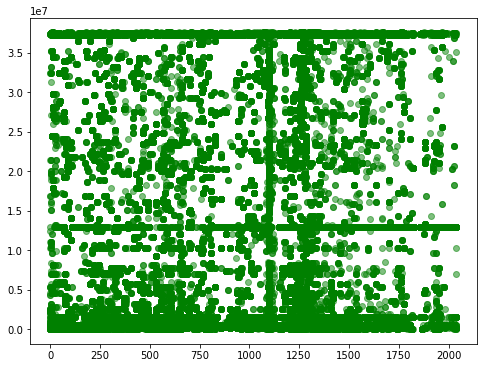

In [56]:

plt.figure(figsize=(8,6))
 
plt.scatter(train_X['league_id'], train_X['home_team_coach_id'],
        color='green', label='donnees sans transformations', alpha=0.5)

plt.show()
 

In [57]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_X.iloc[:,1:])
train_X.iloc[:,1:] = scaling.transform(train_X.iloc[:,1:])

scaling = MinMaxScaler(feature_range=(-1,1)).fit(test_X.iloc[:,1:])
test_X.iloc[:,1:] = scaling.transform(test_X.iloc[:,1:])

<ipython-input-57-199b75d53bc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X.iloc[:,1:] = scaling.transform(train_X.iloc[:,1:])


### Affichage des données après la normalisation:

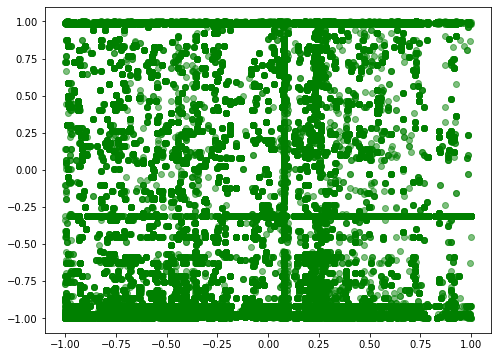

In [58]:
plt.figure(figsize=(8,6))
 
plt.scatter(train_X['league_id'], train_X['home_team_coach_id'],
        color='green', label='donnees sans transformations', alpha=0.5)

plt.show()

In [59]:
train_X

,id,league_id,is_cup,home_team_coach_id,away_team_coach_id,Date_component,Ids_component,history_coach_home_component,history_coach_away_component,away_team_history_opponent_rating_component,home_team_history_opponent_rating_component,away_team_history_rating_component,away_team_history_opponent_goal_components,home_team_history_opponent_goal_components,away_team_history_is_cup_componenent,home_team_history_is_cup_componenent,away_team_history_is_play_home_componenent,home_team_history_is_play_home_componenent,away_team_history_goal_componenent,home_team_history_goal_componenent
0,11906497,-0.377516,-1.0,-0.975075,-0.975075,0.774756,-0.301103,-0.975070,-0.975070,-0.912930,-0.742096,-0.483426,-0.689668,-0.640445,-0.038531,-1.000000,-0.181647,-1.000000,-0.446911,-0.573483
1,11984383,-0.263623,-1.0,-0.972488,0.180200,0.758060,-0.257828,-0.972482,0.180435,-0.649523,-0.474837,-0.770665,-0.519823,-0.638478,-1.000000,-1.000000,0.470455,0.122974,-0.731727,-0.689909
2,11983301,-0.281296,-1.0,-0.866345,-0.975708,0.784450,-0.275712,-0.866317,-0.975703,-0.785528,-0.618813,-0.569643,-0.627120,-0.424474,-1.000000,-1.000000,0.096555,-1.000000,-0.260725,-0.348540
3,11983471,-0.272459,-1.0,-0.917351,-0.975203,0.753332,-0.266632,-0.917333,-0.975198,-0.678944,-0.564555,-0.724777,-0.332265,-0.540403,-0.838750,-1.000000,-0.133638,-0.604974,-0.139379,-0.370495
4,11883005,-0.309769,-1.0,-0.977111,-0.977275,0.752631,-0.304525,-0.977106,-0.422371,-0.715889,-0.599405,-0.710953,-0.672456,-0.509537,-1.000000,-1.000000,0.237356,-1.000000,-0.371245,-0.369940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,-0.216495,-1.0,-0.589650,0.999767,-0.682698,-0.178048,-0.908483,-0.058797,-0.661647,-0.649383,-0.772756,-0.531273,-0.685993,-1.000000,-1.000000,-0.303797,-0.627957,-0.390871,-0.422008
110934,18030096,0.076092,-1.0,-0.975201,-0.122214,-0.855420,0.088310,-0.754501,-0.538430,-0.463887,-0.500598,-0.697612,-0.415814,-0.509733,-1.000000,-0.582024,-0.262227,-0.495016,-0.545607,-0.081653
110935,17715497,0.288169,-1.0,-0.551939,-0.971862,-0.915888,0.379026,-0.626009,-0.968241,-0.874172,-0.708246,-0.662263,-0.946304,-0.632213,-0.694740,-0.692437,-0.561062,0.634305,-0.579981,-0.654314
110936,17944153,-0.351006,-1.0,-0.628780,-0.974886,-0.910767,-0.346254,-0.688523,-0.974887,-0.726927,-0.716577,-0.793184,-0.771596,-0.517310,-1.000000,-1.000000,0.237356,-0.474107,-0.760051,-0.661969


In [60]:
test_X

,id,league_id,is_cup,home_team_coach_id,away_team_coach_id,Date_component,Ids_component,history_coach_home_component,history_coach_away_component,away_team_history_opponent_rating_component,home_team_history_opponent_rating_component,away_team_history_rating_component,away_team_history_opponent_goal_components,home_team_history_opponent_goal_components,away_team_history_is_cup_componenent,home_team_history_is_cup_componenent,away_team_history_is_play_home_componenent,home_team_history_is_play_home_componenent,away_team_history_goal_componenent,home_team_history_goal_componenent
0,17761448,-0.382027,-1.0,-0.489163,0.641487,0.371049,-0.296060,-0.489015,0.641943,-0.667774,-0.796931,-0.774507,-0.602474,-0.831389,-1.000000,-0.196016,-0.473697,0.029084,-0.662675,-0.672962
1,17695487,-0.391875,-1.0,-0.451207,-0.975518,0.424484,-0.368764,-0.697540,-0.975511,-0.728515,-0.726127,-0.655521,-0.723025,-0.594457,-1.000000,-1.000000,0.007517,0.009126,-0.697984,-0.778768
2,17715496,0.076734,-1.0,-0.976553,-0.988248,0.487771,0.120711,-0.969524,-0.988245,-0.657889,-0.807332,-0.770621,-0.592366,-0.583425,-1.000000,-1.000000,0.624644,-0.244851,-0.817302,-0.747357
3,17715493,0.076734,-1.0,0.118743,-0.917399,0.478618,0.155002,0.040807,-0.858663,-0.850958,-0.797020,-0.554752,-0.786623,-0.518794,-0.658151,-1.000000,-0.350653,0.456153,-0.669854,-0.748667
4,17715492,0.076734,-1.0,-0.807585,0.988979,0.504930,0.120631,-0.525666,0.989533,-0.630629,-0.737138,-0.820757,-0.750891,-0.648384,-1.000000,-1.000000,-0.720466,0.628364,-0.816820,-0.705671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,18450246,-0.364793,-1.0,-0.990162,0.999852,-0.964052,-0.340480,-0.990159,0.519068,-0.829352,-0.650801,-0.571007,-0.751012,-0.770605,-1.000000,-1.000000,-0.885924,1.000000,-0.542569,-0.578443
72707,18164889,-0.479688,-1.0,-0.988704,0.999630,-0.976646,-0.460207,-0.988700,0.028677,-0.733582,-0.603603,-0.700501,-0.697990,-0.747316,-1.000000,-0.782887,0.509197,0.244851,-0.758205,-0.489456
72708,18449018,0.116947,-1.0,0.990502,0.990451,-0.219563,0.106410,0.991654,0.991005,-0.706267,-0.651847,-0.427448,-0.858857,-0.451304,0.247175,-0.837591,0.176195,0.015310,-0.628909,-0.612733
72709,17958831,-0.469840,-1.0,-0.975587,-0.972018,-0.999319,-0.428908,-0.975580,-0.972010,-0.781169,-0.460040,-0.743053,-0.780304,-0.765561,-1.000000,-0.797007,0.281553,-0.825584,-0.568794,-0.356614


# 9)Entrainement de notre modèle:

##  Comparaison entre différents algorithmes de classification supervisée

In [61]:
cv_split = KFold(n_splits=5, shuffle=True)

models = {"Naive_Bayes": GaussianNB(),
          "Logistic_Regression": LogisticRegression(),
          "Decision_Tree": DecisionTreeClassifier()}

_data = list()

for model_name in models.keys():
    i = 1
    for train_index, valid_index in cv_split.split(train_X):
        clf =models[model_name]
        _X_train, _X_valid = train_X.iloc[train_index], train_X.iloc[valid_index]
        _y_train, _y_valid = train_Y.loc[train_index], train_Y.loc[valid_index]
        clf.fit(_X_train, _y_train)
        _y_train_pred = clf.predict_proba(_X_train)
        _y_valid_pred = clf.predict_proba(_X_valid)
        _score_train = log_loss(_y_train, _y_train_pred)
        _score_valid = log_loss(_y_valid, _y_valid_pred)
        _data.append([model_name, i, _score_train, _score_valid])
        i += 1

df_kf = pd.DataFrame(_data, columns=['model_name', 'k_fold', 'train_score', 'valid_score'])
df_kf.groupby('model_name')[['train_score', 'valid_score']].mean().reset_index()

,model_name,train_score,valid_score
0,Decision_Tree,0.000041,21.114998
1,Logistic_Regression,1.074022,1.074068
2,Naive_Bayes,1.072641,1.072703


**On constate que l'algorithme le plus adéquat paraport à notre dataset est: "LogisticRegression"**

## XGBoost

**Esseyons de réserver 20% de nos données d'entraineent pour réaliser des validation**

In [62]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(train_X, train_Y, train_size=0.8)

In [63]:
d_train = xgb.DMatrix(X_train, y_train)
d_test = xgb.DMatrix(X_valid, y_valid)

In [64]:
FIXED_PARAMS = {
    'booster': 'gbtree',
    'max_depth': 5, 
    'learning_rate': 0.025,
    'min_split_loss': 0.01,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.25,
    'alpha': 2,
    'lambda': 3,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric':'mlogloss'
    }
num_round = 1000
evallist = [(d_train, 'train'), (d_test, 'valid')]

**on va entrainer et evaluer notre modèle XGB avec les données qu'on a extrait des données d'entrainement précédemment**

In [65]:
#cls_best = OneVsRestClassifier(SVC(kernel='linear', probability=True,verbose=True), n_jobs=-1)
#cls_best = svm.SVC(kernel='linear',probability=True,verbose=True)
#cls_best = LogisticRegression(n_jobs=-1, max_iter=1000)
#cls_best = GaussianNB()
#cls_best = KNeighborsClassifier(n_neighbors=3)
#cls_best = cls_best.fit(train_X, train_Y)
cls_best = xgb.train(FIXED_PARAMS, d_train, num_round, evallist, early_stopping_rounds=20)

C:\Users\Home\anaconda3\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[0]	train-mlogloss:1.09610	valid-mlogloss:1.09612
[1]	train-mlogloss:1.09459	valid-mlogloss:1.09468
[2]	train-mlogloss:1.09234	valid-mlogloss:1.09247
[3]	train-mlogloss:1.09062	valid-mlogloss:1.09081
[4]	train-mlogloss:1.08884	valid-mlogloss:1.08912
[5]	train-mlogloss:1.08746	valid-mlogloss:1.08783
[6]	train-mlogloss:1.08589	valid-mlogloss:1.08633
[7]	train-mlogloss:1.08416	valid-mlogloss:1.08466
[8]	train-mlogloss:1.08269	valid-mlogloss:1.08327
[9]	train-mlogloss:1.08126	valid-mlogloss:1.08191
[10]	train-mlogloss:1.07976	valid-mlogloss:1.08047
[11]	train-mlogloss:1.07827	valid-mlogloss:1.07904
[12]	train-mlogloss:1.07666	valid-mlogloss:1.07750
[13]	train-mlogloss:1.07524	valid-mlogloss:1.07613
[14]	train-mlogloss:1.07412	valid-mlogloss:1.07505
[15]	train-mlogloss:1.07270	valid-mlogloss:1.07365
[16]	train-mlogloss:1.07144	valid-mlogloss:1.07243
[17]	train-mlogloss:1.07076	valid-mlogloss:1.07183
[18]	train-mlogloss:1.06964	valid-mlogloss:1.07076
[19]	train-mlogloss:1.06867	valid-mloglos

[160]	train-mlogloss:1.01158	valid-mlogloss:1.02122
[161]	train-mlogloss:1.01145	valid-mlogloss:1.02115
[162]	train-mlogloss:1.01135	valid-mlogloss:1.02112
[163]	train-mlogloss:1.01119	valid-mlogloss:1.02103
[164]	train-mlogloss:1.01105	valid-mlogloss:1.02095
[165]	train-mlogloss:1.01091	valid-mlogloss:1.02088
[166]	train-mlogloss:1.01081	valid-mlogloss:1.02083
[167]	train-mlogloss:1.01064	valid-mlogloss:1.02072
[168]	train-mlogloss:1.01053	valid-mlogloss:1.02066
[169]	train-mlogloss:1.01041	valid-mlogloss:1.02060
[170]	train-mlogloss:1.01029	valid-mlogloss:1.02054
[171]	train-mlogloss:1.01016	valid-mlogloss:1.02047
[172]	train-mlogloss:1.01000	valid-mlogloss:1.02036
[173]	train-mlogloss:1.00988	valid-mlogloss:1.02030
[174]	train-mlogloss:1.00971	valid-mlogloss:1.02019
[175]	train-mlogloss:1.00958	valid-mlogloss:1.02012
[176]	train-mlogloss:1.00947	valid-mlogloss:1.02007
[177]	train-mlogloss:1.00934	valid-mlogloss:1.01997
[178]	train-mlogloss:1.00924	valid-mlogloss:1.01994
[179]	train-

[318]	train-mlogloss:0.99620	valid-mlogloss:1.01436
[319]	train-mlogloss:0.99612	valid-mlogloss:1.01433
[320]	train-mlogloss:0.99604	valid-mlogloss:1.01431
[321]	train-mlogloss:0.99599	valid-mlogloss:1.01430
[322]	train-mlogloss:0.99592	valid-mlogloss:1.01429
[323]	train-mlogloss:0.99584	valid-mlogloss:1.01427
[324]	train-mlogloss:0.99577	valid-mlogloss:1.01427
[325]	train-mlogloss:0.99570	valid-mlogloss:1.01424
[326]	train-mlogloss:0.99563	valid-mlogloss:1.01422
[327]	train-mlogloss:0.99556	valid-mlogloss:1.01419
[328]	train-mlogloss:0.99549	valid-mlogloss:1.01416
[329]	train-mlogloss:0.99542	valid-mlogloss:1.01414
[330]	train-mlogloss:0.99536	valid-mlogloss:1.01413
[331]	train-mlogloss:0.99530	valid-mlogloss:1.01411
[332]	train-mlogloss:0.99523	valid-mlogloss:1.01408
[333]	train-mlogloss:0.99517	valid-mlogloss:1.01407
[334]	train-mlogloss:0.99509	valid-mlogloss:1.01406
[335]	train-mlogloss:0.99503	valid-mlogloss:1.01404
[336]	train-mlogloss:0.99497	valid-mlogloss:1.01403
[337]	train-

[476]	train-mlogloss:0.98688	valid-mlogloss:1.01283
[477]	train-mlogloss:0.98683	valid-mlogloss:1.01282
[478]	train-mlogloss:0.98676	valid-mlogloss:1.01283
[479]	train-mlogloss:0.98671	valid-mlogloss:1.01283
[480]	train-mlogloss:0.98667	valid-mlogloss:1.01282
[481]	train-mlogloss:0.98663	valid-mlogloss:1.01282
[482]	train-mlogloss:0.98657	valid-mlogloss:1.01282
[483]	train-mlogloss:0.98651	valid-mlogloss:1.01282
[484]	train-mlogloss:0.98646	valid-mlogloss:1.01282
[485]	train-mlogloss:0.98641	valid-mlogloss:1.01282
[486]	train-mlogloss:0.98634	valid-mlogloss:1.01281
[487]	train-mlogloss:0.98631	valid-mlogloss:1.01282
[488]	train-mlogloss:0.98626	valid-mlogloss:1.01281
[489]	train-mlogloss:0.98620	valid-mlogloss:1.01281
[490]	train-mlogloss:0.98616	valid-mlogloss:1.01282
[491]	train-mlogloss:0.98611	valid-mlogloss:1.01282
[492]	train-mlogloss:0.98607	valid-mlogloss:1.01281
[493]	train-mlogloss:0.98602	valid-mlogloss:1.01281
[494]	train-mlogloss:0.98595	valid-mlogloss:1.01279
[495]	train-

[634]	train-mlogloss:0.97904	valid-mlogloss:1.01244
[635]	train-mlogloss:0.97900	valid-mlogloss:1.01245
[636]	train-mlogloss:0.97894	valid-mlogloss:1.01244
[637]	train-mlogloss:0.97889	valid-mlogloss:1.01244
[638]	train-mlogloss:0.97884	valid-mlogloss:1.01244
[639]	train-mlogloss:0.97879	valid-mlogloss:1.01244
[640]	train-mlogloss:0.97874	valid-mlogloss:1.01244
[641]	train-mlogloss:0.97868	valid-mlogloss:1.01243
[642]	train-mlogloss:0.97864	valid-mlogloss:1.01243
[643]	train-mlogloss:0.97861	valid-mlogloss:1.01243
[644]	train-mlogloss:0.97857	valid-mlogloss:1.01242
[645]	train-mlogloss:0.97852	valid-mlogloss:1.01242
[646]	train-mlogloss:0.97847	valid-mlogloss:1.01242
[647]	train-mlogloss:0.97843	valid-mlogloss:1.01243
[648]	train-mlogloss:0.97838	valid-mlogloss:1.01242
[649]	train-mlogloss:0.97835	valid-mlogloss:1.01242
[650]	train-mlogloss:0.97830	valid-mlogloss:1.01241
[651]	train-mlogloss:0.97826	valid-mlogloss:1.01240
[652]	train-mlogloss:0.97820	valid-mlogloss:1.01240
[653]	train-

**après avoir testé pas mal d'algorithme de classification supervisé, on est arrivé à une conclusion qui est la suivante:
l'algorithme xg (XGBoost) est le plus précit concernant notre useCase 
c'est un algorithme basé sur gradient boostingmachinece qui le rend très performante vue qu'il corrige l'erreur des itérations précédente**

# 10)Prédiction et création de notre fichier de soumission:

**il nous rest qu'à prédire nos données de tests avec la fonction predict() et admirer la précision de notre modèle**

In [70]:
X_test_d = xgb.DMatrix(test_X)

#if using one of the others algorithmes
#predictions = cls_best.predict_proba(test_X)

predictions = cls_best.predict(X_test_d)
submission = pd.DataFrame(predictions)
temp_df = test_X
submission['id'] = temp_df['id'].astype("Int32")

**On crée une autre dataframe submission qui vas etre sous un format bien spécifique et c'est elle qui est demandé lors de la soumission de notre solution sur kaggle**

In [71]:
submission

,0,1,2,id
0,0.326214,0.473068,0.200718,17761448
1,0.312336,0.317720,0.369944,17695487
2,0.324898,0.379648,0.295453,17715496
3,0.309491,0.201287,0.489222,17715493
4,0.314614,0.468379,0.217007,17715492
...,...,...,...,...
72706,0.306442,0.391295,0.302263,18450246
72707,0.229221,0.629594,0.141184,18164889
72708,0.247968,0.207858,0.544173,18449018
72709,0.224678,0.632311,0.143012,17958831


In [72]:
#draw: 0 
#home: 1
#away: 2 

submission.columns = ['draw', 'home', 'away','id']
submission

,draw,home,away,id
0,0.326214,0.473068,0.200718,17761448
1,0.312336,0.317720,0.369944,17695487
2,0.324898,0.379648,0.295453,17715496
3,0.309491,0.201287,0.489222,17715493
4,0.314614,0.468379,0.217007,17715492
...,...,...,...,...
72706,0.306442,0.391295,0.302263,18450246
72707,0.229221,0.629594,0.141184,18164889
72708,0.247968,0.207858,0.544173,18449018
72709,0.224678,0.632311,0.143012,17958831


**Maintenant que notre solution est bien formé et stocké sur la variable "submission" il suffit de la transformer en un fichier Csv et de la soumettre sur kaggle**

In [73]:
submission.to_csv("./submission.csv", index=False)